In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, matthews_corrcoef, mean_absolute_error

In [2]:
df = pd.read_excel(
    r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\pages\data\All_data.xlsx")

In [3]:
df['DeltaFlow']=abs(df['MFOA (m3/s)']-df['MFOP ((m3/s)/(m3/s))'])

In [6]:
categorical_features = list(set(df.columns)-set(df.
_get_numeric_data().columns))
categorical_features

['Unnamed: 45',
 'index',
 'Unnamed: 43',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41']

In [7]:
numerical_features = list(df._get_numeric_data().columns)
numerical_features

['TVA (m3)',
 'SPPA (kPa)',
 'MFOA (m3/s)',
 'MFOP ((m3/s)/(m3/s))',
 'GASA (mol/mol)',
 'STATUS',
 'id',
 'DeltaFlow']

In [5]:
df.to_excel('all data_delta_flow.xlsx',index=False)

In [14]:
X = df[['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']]
y = df['STATUS']

In [15]:
X.shape

(93493, 5)

In [19]:
k = 10
knn = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(knn,X,y,cv=k,scoring='accuracy')


In [21]:
print(scores.mean())

0.9836777258341565


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, matthews_corrcoef, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = cross_val_predict(knn, X, y, cv=k)

In [25]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
mae = mean_absolute_error(y, y_pred)
mcc = matthews_corrcoef(y, y_pred)
cm = confusion_matrix(y, y_pred)

In [26]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('MAE:', mae)
print('MCC:', mcc)
print('Confusion matrix:\n', cm)

Accuracy: 0.9836779224113035
Precision: 0.9866870374195988
Recall: 0.9836779224113035
F1 score: 0.9850757652585354
MAE: 0.01632207758869648
MCC: 0.3253842561941948
Confusion matrix:
 [[91594   960]
 [  566   373]]


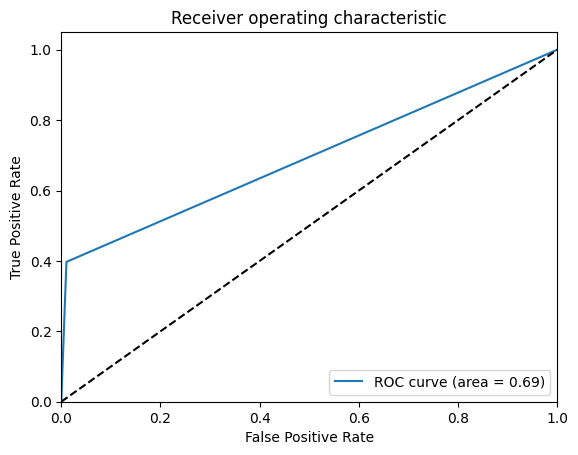

In [27]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

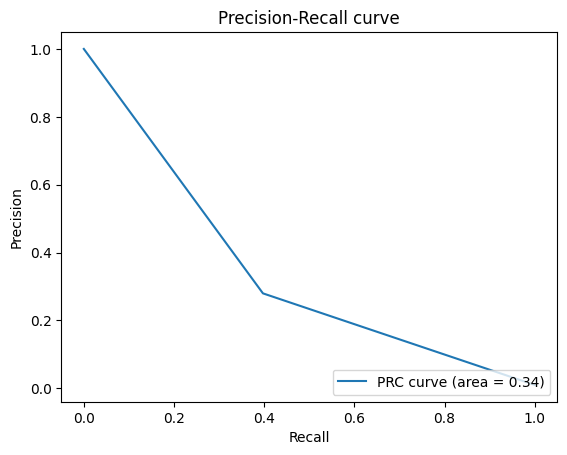

In [28]:
precision, recall, thresholds = precision_recall_curve(y, y_pred)
prc_auc = auc(recall, precision)

plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()